# Ejercicio 2. Entrenamiento de modelos con Keras

En este segundo ejercicio tendrás que trabajar con Keras para probar las técnicas que has visto hasta la Práctica 5.2, incluyendo regularización (L2, dropout, data augmentation, K-validación cruzada, etc.), capas convolucionales, pooling, densas, etc. con al menos 4 configuraciones distintas.

Para ello, vas a tener que trabajar con un conjunto de datos sobre imágenes de abejas. 

![abeja](img/abeja.jpg)

## 1. Enunciado

Empleando el dataset de abejas polinizadas (ver apartado 3), debes construir y probar **al menos 4** configuraciones de modelos con Keras que sean sustancialmente distintas. Debes jugar con:
* K-validación o validación cruzada.
* Regularización: L1/L2, early stopping, dropout.
* Data augmentation (echando un vistazo al dataset, ¿qué tipo de transformación harías? ¿qué ventaja se obtiene al usarlo?).
* Distintas arquitecturas de redes convolucionales (distinta cantidad y orden de capas convolucionales, pooling, densas, etc.).
* Distintos optimizadores (Adam, RMSprop, momentum, etc.), factor de aprendizaje y número de épocas.

Después, entrénalas con los datos leídos y analiza los resultados, haciendo una comparativa y razonando lo obtenido.

## 2. Entrega

La entrega de este ejercicio se realiza a través de la tarea creada para tal efecto en Enseñanza Virtual. Tienes que entregar un notebook, y el HTML generado a partir de él, cuyas celdas estén ya evaluadas.

La estructura del notebook debe contener los siguientes apartados:

0. Cabecera: nombre y apellidos.
1. Dataset: descripción, carga y visualización.
2. Preparación de los datos para ser usados en Keras.
3. Modelos y configuraciones creados en Keras (un sub-apartado para cada uno, explicando de forma razonada, con tus palabras y figuras, la arquitectura probada).
4. Entrenamiento y evaluación de cada modelo creado (un sub-apartado para cada uno).
5. Análisis de resultados.
6. Bibliografía utilizada (enlaces web, material de clase, libros, etc.).

### 2.1. Nota importante
-----
**HONESTIDAD ACADÉMICA Y COPIAS: un trabajo práctico es un examen, por lo que
debe realizarse de manera individual. La discusión y el intercambio de
información de carácter general con los compañeros se permite (e incluso se
recomienda), pero NO AL NIVEL DE CÓDIGO. Igualmente el remitir código de
terceros, OBTENIDO A TRAVÉS DE LA RED o cualquier otro medio, se considerará
plagio.** 

**Cualquier plagio o compartición de código que se detecte significará
automáticamente la calificación de CERO EN LA ASIGNATURA para TODOS los
alumnos involucrados. Por tanto a estos alumnos NO se les conservará, para
futuras convocatorias, ninguna nota que hubiesen obtenido hasta el momento.
SIN PERJUICIO DE OTRAS MEDIDAS DE CARÁCTER DISCIPLINARIO QUE SE PUDIERAN
TOMAR.**

-----

## 3. El Dataset: Honey Bee Pollen <a class="anchor" id="transferdata"></a>

Este pequeño dataset está disponible en Kaggle, donde se grabó con cámara de vídeo a abejas transportando y sin transportar polen. Se extrajo imágenes y se recortó para que el conjunto de datos solo contenga imágenes de abejas con y sin polen. El enlace al dataset es el siguiente [bees](https://www.kaggle.com/ivanfel/honey-bee-pollen).

A continuación se dispone código para entender cómo está estructurado el dataset, y qué debes hacer para adaptarlo a Keras. Tienes que usar este código solo a modo orientativo, puedes cambiar todo lo que te sea necesario.

In [14]:
import pandas as pd


Leemos el fichero CSV, el cual dice por cada fichero el tipo de abeja (si llevaba polen 1 o no 0).

In [15]:
path="bees/images_bees/"
data = pd.read_csv("bees/pollen_data.csv")
data.head()

,Unnamed: 0,filename,pollen_carrying
0,0,P10057-125r.jpg,1
1,1,P57380-120r.jpg,1
2,2,NP63671-221r.jpg,0
3,3,NP53776-47r.jpg,0
4,4,NP13382-201r.jpg,0


Con la siguiente función cargamos cada nombre de imagen con su clasificación.

In [16]:
def dataset_gen(data):
    
    img_data = []
    labels = []
    for img_name, pollen_carrying in zip(data['filename'], data['pollen_carrying']):
        img_data.append(img_name)
        labels.append(pollen_carrying)
        
    return np.array(img_data), np.array(labels)

In [18]:
X,Y=dataset_gen(data)

In [21]:
X

array(['P10057-125r.jpg', 'P57380-120r.jpg', 'NP63671-221r.jpg',
       'NP53776-47r.jpg', 'NP13382-201r.jpg', 'P63866-224r.jpg',
       'P22071-82r.jpg', 'NP64043-227r.jpg', 'NP59420-165r.jpg',
       'P63758-222r.jpg', 'NP7466-94r.jpg', 'P10154-129r.jpg',
       'P64068-228r.jpg', 'NP59840-177r.jpg', 'P55845-94r.jpg',
       'P19209-27r.jpg', 'P12673-178r.jpg', 'P64234-230r.jpg',
       'P18721-13r.jpg', 'NP25986-168r.jpg', 'P26791-189r.jpg',
       'P6961-88r.jpg', 'NP63640-219r.jpg', 'P65298-242r.jpg',
       'P7466-93r.jpg', 'P11735-162r.jpg', 'P8973-107r.jpg',
       'P53866-56r.jpg', 'NP29062-244r.jpg', 'P1149-10r.jpg',
       'NP57555-127r.jpg', 'NP5762-71r.jpg', 'P19401-31r.jpg',
       'P63199-210r.jpg', 'NP26910-194r.jpg', 'P2883-17r.jpg',
       'NP7621-96r.jpg', 'P61949-194r.jpg', 'P53247-38r.jpg',
       'P27702-211r.jpg', 'NP25968-164r.jpg', 'NP29088-246r.jpg',
       'NP24063-128r.jpg', 'P14448-224r.jpg', 'NP1768-12r.jpg',
       'P65528-248r.jpg', 'NP13365-199r.jpg', '

Esta es la forma que tienen las imágenes (el siguiente código se ejecutó en otro entorno donde se cargaron previamente las imágenes, **si se vuelve a evaluar se perderá la imagen**).

Text(0.5, 1.0, '0')

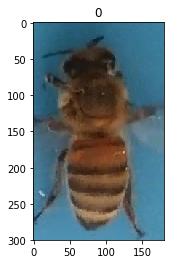

In [5]:
#plt.imshow(X[0])
#plt.title(Y[0])

Con sklearn podemos hacer la partición aleatoria del conjunto de datos en train y test.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

Lo siguiente da una muestra de imágenes del conjunto de entrenamiento con sus respectivas etiquetas (recuerda: esto no se ejecutó en este entorno, ya que las imágenes estaban previamente cargadas).

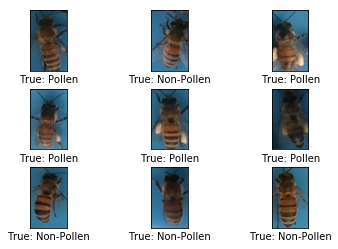

In [29]:
#class_names=list(['Non-Pollen','Pollen'])
#plot_images(images=X_train[0:9], cls_true=Y_train[0:9], smooth=True)

### 3.1. Carga del Dataset

Tendrás que modificar la estructura de directorios y reordenar las imágenes para usar el generador de Keras, tal y como se hizo en la práctica 5.2 con el dataset `cats and dogs`. Puedes basarte en el código anterior para determinar la clase de cada imagen (o también puedes observar que la primera letra del nombre de los ficheros indica si lleva (P) o no (N) polen). También puedes (y quizás deberías) cambiar el tamaño del conjunto de test creado arriba.